# 1. Problem


The problem I am trying to solve in this experiment is finding a machine learning algorithm that accurately predicts whether an individual will have a stroke depending on certain health characteristics. These health characteristics include age, gender, marriage status, smoking habits, and the presence of hypertension or heart disease, which were provided in the dataset I am using from Kaggle. I will be using these columns as the predictor variables, and my target variable is stroke, which is either 0 or 1. This aligns with a classification problem, so I will be using perceptron, multilayer perceptron, and stochastic gradient descent models. I will be comparing these models using accuracy and confusion matrices to reduce false negatives or false positives. 

# 2. Data Preparation

To prepare my data, I checked for any null values in the columns, and I found that one column, BMI, contained nulls. In order to determine whether to drop the values or replace them, I checked the number of missing values and found there were 201. I replaced these with the mean BMI value because dropping 201 entries was a significant chunk of the dataset. After this, I confirmed that the dataset no longer had any null values. In addition, I used indicator variables to replace categorical data, such as work type and smoking status. I replaced other categorical data, including gender, marriage status, and residence type, with 0, 1, or 2s. After this cleaning was complete, I affirmed that the data was prepared for use by checking the data types of each column, and they were all either float or int values. 

In [1]:
# load and prepare your data here
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/CS167/Datasets/healthcare-dataset-stroke-data.csv')
data.head()

Mounted at /content/drive


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
data.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [3]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
mean_value=data['bmi'].mean()
data['bmi'].fillna(value=mean_value, inplace=True)

In [5]:
data.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [6]:
data.gender.replace('Male', 0, inplace=True)
data.gender.replace('Female', 1, inplace=True)
data.gender.replace('Other', 2, inplace=True)

data.ever_married.replace('No', 0, inplace=True)
data.ever_married.replace('Yes', 1, inplace=True)

data.Residence_type.replace('Urban', 0, inplace=True)
data.Residence_type.replace('Rural', 1, inplace=True)

data=pd.get_dummies(data, columns=['work_type', "smoking_status"])
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0,67.0,0,1,1,0,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,51676,1,61.0,0,0,1,1,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,31112,0,80.0,0,1,1,1,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,60182,1,49.0,0,0,1,0,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,1665,1,79.0,1,0,1,1,174.12,24.000000,1,0,0,0,1,0,0,0,1,0


In [11]:
data.dtypes

id                                  int64
gender                              int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

In [25]:
data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# 3. Research


<Axes: >

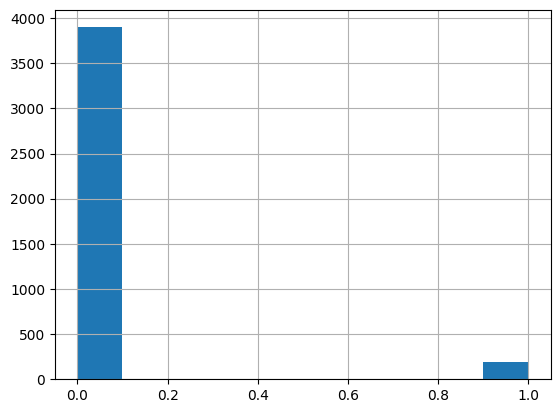

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


predictors = data.columns.drop('stroke')
target = "stroke"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_sln.hist()

## Perceptron

Stroke prediction accuracy: 0.9197651663405088


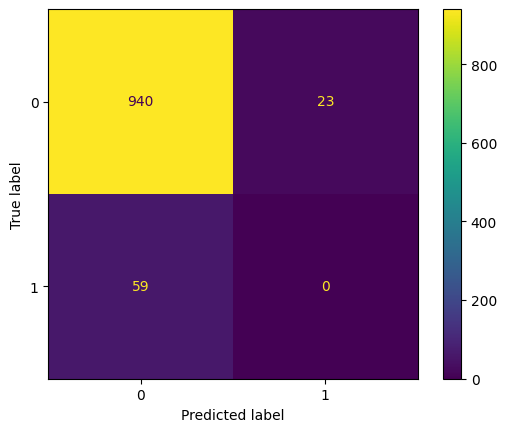

In [39]:
import pandas
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#ignoring warings
import warnings
warnings.filterwarnings("ignore")

#loading Perceptron
perceptron = Perceptron()
perceptron.fit(train_data,train_sln)
stroke_predictions = perceptron.predict(test_data)

#output accuracy
print("Stroke prediction accuracy:", metrics.accuracy_score(test_sln, stroke_predictions))

# Confusion Matrix
vals = [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, stroke_predictions, labels=vals)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

Accuracy:  0.9432485322896281


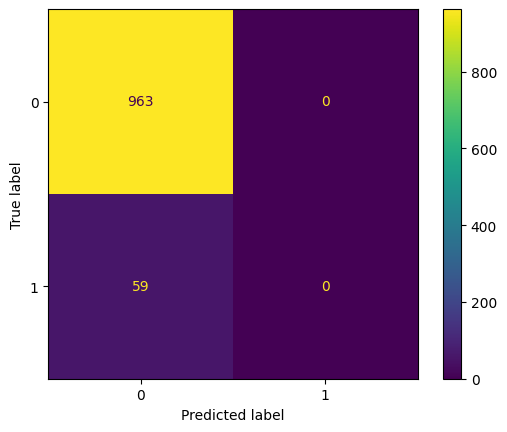

In [28]:
penalty=['l2','l1','elasticnet']
alpha=[0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]
accuracy=[]

#tuning the alpha parameter
for a in alpha:
  perceptron = Perceptron(alpha=a, penalty='l2')
  perceptron.fit(train_data,train_sln)
  stroke_predictions = perceptron.predict(test_data)
  accuracy.append(metrics.accuracy_score(test_sln, stroke_predictions))

print("Accuracy: ",max(accuracy))
# Confusion Matrix
vals = [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, stroke_predictions, labels=vals)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

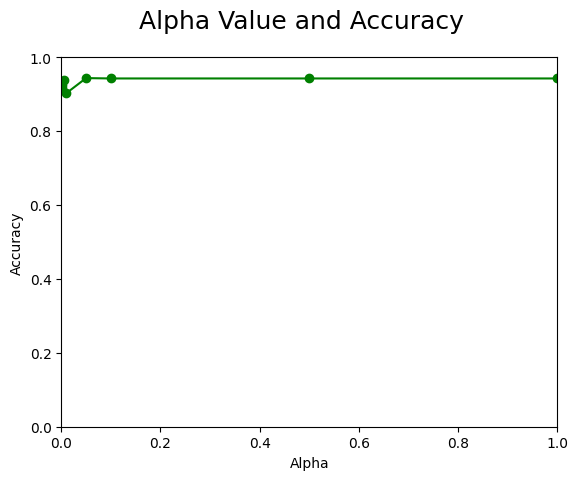

The best alpha value is  0.05


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

#graphing the data
plt.suptitle('Alpha Value and Accuracy',fontsize=18)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.plot(alpha, accuracy, 'go-')
plt.axis([0,1,0,1])

plt.show()
print("The best alpha value is ",alpha[accuracy.index(max(accuracy))])

Accuracy:  0.9422700587084148


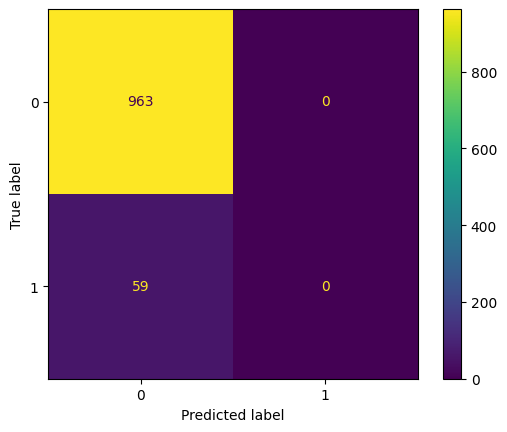

In [29]:
perceptron = Perceptron(alpha=0.1, penalty='l2')
perceptron.fit(train_data,train_sln)
stroke_predictions = perceptron.predict(test_data)
print("Accuracy: ",metrics.accuracy_score(test_sln, stroke_predictions))

# Confusion Matrix
vals = [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, stroke_predictions, labels=vals)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

## Multilayer Perceptron

Accuracy:  0.9354207436399217


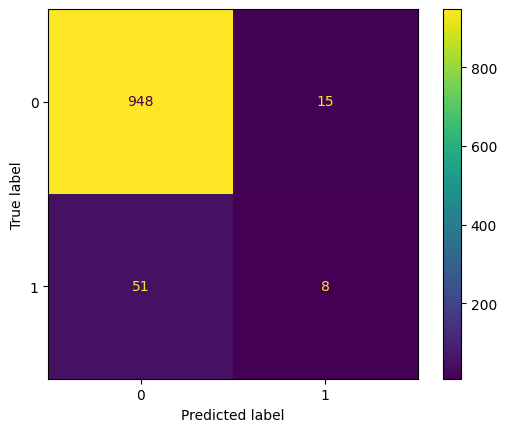

In [30]:
# Set up MLP
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_data,train_sln)
stroke_predictions = mlp.predict(test_data)

print("Accuracy: ", metrics.accuracy_score(test_sln,stroke_predictions))

# Confusion Matrix
vals = [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, stroke_predictions, labels=vals)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

In [32]:
activation=['identity', 'logistic', 'tanh', 'relu']
accuracy=[]

for a in activation:
  mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800, activation=a)
  mlp.fit(train_data,train_sln)
  stroke_predictions = mlp.predict(test_data)
  accuracy.append(metrics.accuracy_score(test_sln, stroke_predictions))

print(max(accuracy))


0.9422700587084148


The best activation function is:  identity
Accuracy:  0.9422700587084148


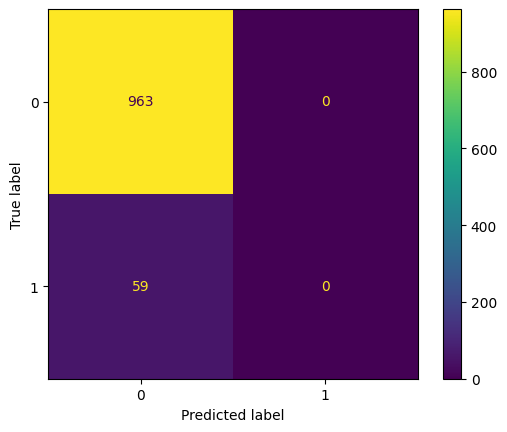

In [33]:
print("The best activation function is: ",activation[accuracy.index(max(accuracy))])

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800, activation='identity')
mlp.fit(train_data,train_sln)
stroke_predictions = mlp.predict(test_data)
accuracy.append(metrics.accuracy_score(test_sln, stroke_predictions))

print("Accuracy: ", metrics.accuracy_score(test_sln,stroke_predictions))

# Confusion Matrix
vals = [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, stroke_predictions, labels=vals)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

## Stochastic Gradient Descent

Accuracy:  0.9422700587084148


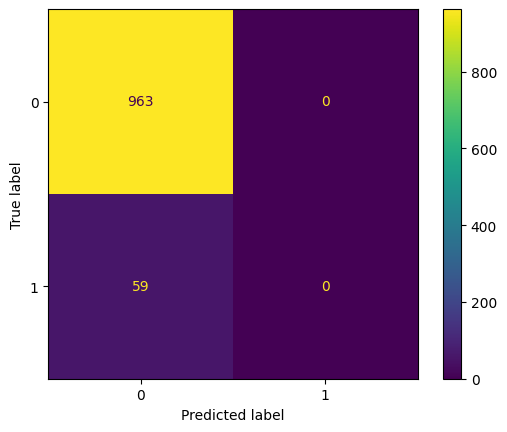

In [34]:
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier()
sgd.fit(train_data,train_sln)
stroke_predictions=sgd.predict(test_data)
print("Accuracy: ", metrics.accuracy_score(test_sln, stroke_predictions))

# Confusion Matrix
vals = [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, stroke_predictions, labels=vals)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()


In [35]:
loss=['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
accuracy=[]
for l in loss:
  sgd=SGDClassifier(loss=l)
  sgd.fit(train_data,train_sln)
  stroke_predictions=sgd.predict(test_data)
  accuracy.append(metrics.accuracy_score(test_sln, stroke_predictions))

In [36]:
bestLoss=loss[accuracy.index(max(accuracy))]
print("The best loss parameter is ",bestLoss)

accuracy=[]
for a in alpha:
  sgd=SGDClassifier(loss=bestLoss, alpha=a)
  sgd.fit(train_data,train_sln)
  stroke_predictions=perceptron.predict(test_data)
  accuracy.append(metrics.accuracy_score(test_sln, stroke_predictions))


The best loss parameter is  squared_epsilon_insensitive


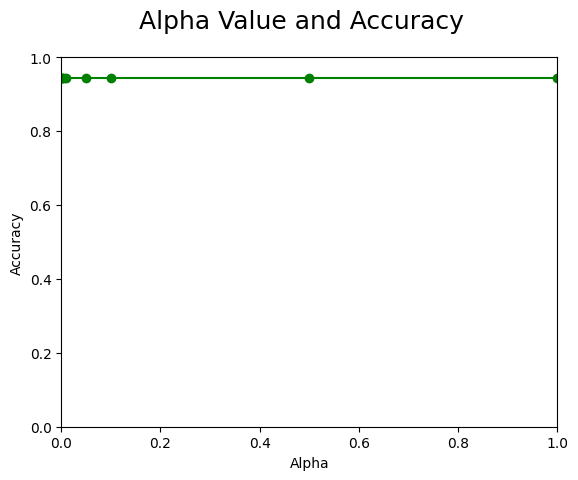

The best alpha value is  1e-05


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

#graphing the data
plt.suptitle('Alpha Value and Accuracy',fontsize=18)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.plot(alpha, accuracy, 'go-')
plt.axis([0,1,0,1])

plt.show()
print("The best alpha value is ",alpha[accuracy.index(max(accuracy))])

0.9217221135029354


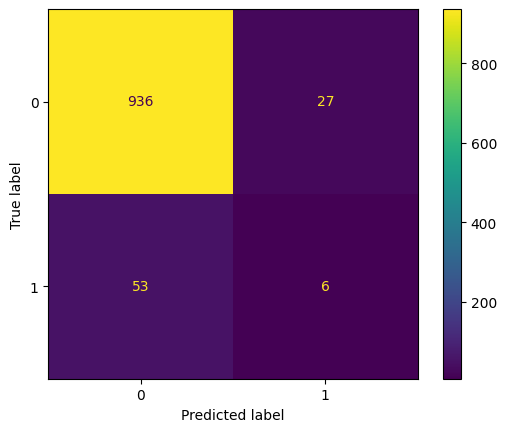

In [38]:
sgd=SGDClassifier(loss='hinge', alpha=0.00001)
sgd.fit(train_data,train_sln)
stroke_predictions=sgd.predict(test_data)
print(metrics.accuracy_score(test_sln, stroke_predictions))


# Confusion Matrix
vals = [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, stroke_predictions, labels=vals)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

# 4. Analysis

Through this experiment, I discovered the untuned multilayer perceptron was the best model for this stroke dataset, as it provided a 93.5% accuracy and the least amount (51) of false negatives. I believe this was the case because the data may have been non-linearly separable, and the multilayer perceptron performs well on this type of data. My insight from this would be to recommend tuning different parameters and keeping the default value for the activation function. Changes to the activation function produced a model that provided more false negatives. My other two models, the perceptron and stochastic gradient descent, performed well with accuracy rates of 94% and 92% respectively. However, both models provided more false negative predictions, which should be more heavily weighted when evaluating the success of a diagnosis-related prediction model. 